## **Implementing Regularization Techniques in Keras**

Let's dive deeper into how we can implement regularization techniques in Keras to prevent overfitting and improve the generalization of our models. We will cover L2 regularization and Dropout with detailed explanations and step-by-step code examples.

## **L2 Regularization in Keras**

L2 regularization, also known as Ridge regularization, adds a penalty equal to the sum of the squared values of the weights. This penalty term discourages large weights, helping the model generalize better.

Here's how we can implement L2 regularization in Keras:

In [ ]:
!pip install keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.regularizers import l2

# Set random seed for reproducibility
np.random.seed(7)


**Loading and Preprocessing the CIFAR-10 Dataset**

Next, we'll load and preprocess the CIFAR-10 dataset. The dataset contains 50,000 training images and 10,000 test images of 32x32 color images in 10 classes.

In [ ]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the inputs from 0-255 to 0-1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

1. **Loading Data:** The cifar10.load_data() function loads the dataset into training and test sets.
2. **Normalizing Data:** The pixel values are normalized to the range [0, 1].
3. **One Hot Encoding:** The labels are one-hot encoded for classification using to_categorical from keras.utils.

`to_categorical(y_train)` converts the integer class labels in `y_train` into one-hot encoded vectors, which is a binary matrix representation of the labels. This is useful for classification tasks where the model's output layer uses softmax activation.

**Visualizing Some Sample Images**

Let's visualize some sample images from the CIFAR-10 dataset along with their true labels.

In [ ]:
len(X_train)

50000

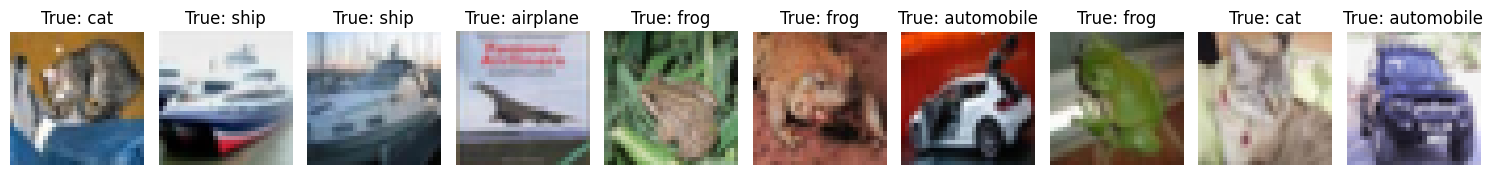

In [ ]:
# Define a function to plot images
def plot_images(images, labels, predictions=None):
    fig, axes = plt.subplots(1, 10, figsize=(15, 3))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        if predictions is None:
            ax.set_title(f'True: {labels[i]}')
        else:
            ax.set_title(f'True: {labels[i]}\nPred: {predictions[i]}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Class names in CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Convert one-hot encoded labels back to integers
true_labels = np.argmax(y_test[:10], axis=1)

# Get the true class names for the sample images
sample_images = X_test[:10]
sample_labels = [class_names[label] for label in true_labels]
plot_images(sample_images, sample_labels)


**Explanation:**

1. **Plotting Function:** The plot_images function plots a given set of images along with their labels. If predictions are provided, it also shows the predicted labels.
2. **Class Names:** The class_names list contains the names of the classes in the CIFAR-10 dataset.
True Labels: Convert the one-hot encoded labels back to integers using np.argmax.
3. **Sample Images and Labels:** Select the first 10 images from the test set and get their true class names for visualization.

**Building the CNN Model with Regularization**

We'll now build our CNN model, adding L2 regularization and Dropout layers.

**L2 Regularization in Keras**

L2 regularization, also known as Ridge regularization, adds a penalty equal to the sum of the squared values of the weights. This penalty term discourages large weights, helping the model generalize better.

**Dropout in Keras**

Dropout is a regularization technique that randomly drops a fraction of neurons during training. This prevents neurons from co-adapting too much and helps the network generalize better.

In [ ]:
# Define the model
model = Sequential()

# Add a Conv2D layer with L2 regularization

# This is a convolutional layer with 32 filters, a 3x3 kernel, ReLU activation,
# and L2 regularization. The input shape is (32, 32, 3) for 32x32 color images.
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', kernel_regularizer=l2(0.001)))
# This pooling layer reduces the spatial dimensions by a factor of 2.
model.add(MaxPooling2D(pool_size=(2, 2)))
# This Dropout layer randomly drops 25% of the neurons during training.
model.add(Dropout(0.25))




# Add a second Conv2D layer
# Another convolutional layer with 64 filters, ReLU activation, and L2 regularization.
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
# Another pooling layer reduces the spatial dimensions.
model.add(MaxPooling2D(pool_size=(2, 2)))
# Another Dropout layer with a 25% dropout rate.
model.add(Dropout(0.25))

# Flatten the output and add a Dense layer
# Flattens the 2D output to 1D for the fully connected layers.
model.add(Flatten())
# A dense layer with 512 neurons, ReLU activation, and L2 regularization.
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
# A Dropout layer with a 50% dropout rate.
model.add(Dropout(0.5))

# Add the output layer
# The output layer has num_classes neurons (10 for CIFAR-10), with softmax activation for multi-class classification.
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
# We compile the model with categorical crossentropy loss, Adam optimizer, and accuracy as the metric.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Why Use L2 Regularization and Dropout?**

* **L2 Regularization:** Helps to reduce the complexity of the model by penalizing large weights. This can lead to a model that generalizes better on unseen data. It also helps in reducing overfitting by penalizing large weights.
* **Dropout:** Prevents overfitting by ensuring that neurons cannot rely solely on specific other neurons. This encourages the network to learn more robust features. This prevents neurons from co-adapting too much.

**Combining L2 Regularization and Dropout**

Often, using a combination of regularization techniques can yield better results.

By combining these techniques, we ensure that the model is regularized both by penalizing large weights and by preventing the neurons from co-adapting.

The softmax activation function is used in the output layer of a neural network for multi-class classification problems. It converts the raw output scores (logits) of the network into probabilities by applying the exponential function to each score and then normalizing these values so that they sum to 100%. This way, each output value represents the probability of the input belonging to each class.

In essence, softmax ensures that the output values are in the range [0, 1] and their sum is 1, making them interpretable as probabilities.

**Training and Evaluating the Model**

Finally, we'll train and evaluate the model on the CIFAR-10 dataset.

In [ ]:
# Train the model

# We train the model for 50 epochs with a batch size of 64.
# The validation_data parameter allows us to monitor the model's performance on the test set during training.
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=2)

# Evaluate the model
# We evaluate the model's performance on the test set and print the test loss and accuracy.
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {scores[0]}")
print(f"Test accuracy: {scores[1]}")


Epoch 1/10
782/782 - 90s - loss: 1.8581 - accuracy: 0.4115 - val_loss: 1.5099 - val_accuracy: 0.5406 - 90s/epoch - 116ms/step
Epoch 2/10
782/782 - 79s - loss: 1.5284 - accuracy: 0.5321 - val_loss: 1.4455 - val_accuracy: 0.5957 - 79s/epoch - 101ms/step
Epoch 3/10
782/782 - 99s - loss: 1.4527 - accuracy: 0.5739 - val_loss: 1.3094 - val_accuracy: 0.6420 - 99s/epoch - 127ms/step
Epoch 4/10
782/782 - 79s - loss: 1.4038 - accuracy: 0.5930 - val_loss: 1.3139 - val_accuracy: 0.6365 - 79s/epoch - 101ms/step
Epoch 5/10
782/782 - 83s - loss: 1.3811 - accuracy: 0.6084 - val_loss: 1.2947 - val_accuracy: 0.6421 - 83s/epoch - 106ms/step
Epoch 6/10
782/782 - 81s - loss: 1.3551 - accuracy: 0.6217 - val_loss: 1.2482 - val_accuracy: 0.6700 - 81s/epoch - 104ms/step
Epoch 7/10
782/782 - 82s - loss: 1.3418 - accuracy: 0.6293 - val_loss: 1.2819 - val_accuracy: 0.6467 - 82s/epoch - 105ms/step
Epoch 8/10
782/782 - 81s - loss: 1.3302 - accuracy: 0.6366 - val_loss: 1.2204 - val_accuracy: 0.6821 - 81s/epoch - 103

In [ ]:
# Train the model

# We train the model for 50 epochs with a batch size of 64.
# The validation_data parameter allows us to monitor the model's performance on the test set during training.
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, verbose=2)

# Evaluate the model
# We evaluate the model's performance on the test set and print the test loss and accuracy.
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {scores[0]}")
print(f"Test accuracy: {scores[1]}")


Epoch 1/50
782/782 - 73s - loss: 1.8131 - accuracy: 0.4239 - val_loss: 1.4821 - val_accuracy: 0.5480 - 73s/epoch - 94ms/step
Epoch 2/50
782/782 - 73s - loss: 1.5249 - accuracy: 0.5379 - val_loss: 1.4500 - val_accuracy: 0.5914 - 73s/epoch - 94ms/step
Epoch 3/50
782/782 - 73s - loss: 1.4714 - accuracy: 0.5671 - val_loss: 1.4129 - val_accuracy: 0.5964 - 73s/epoch - 94ms/step
Epoch 4/50
782/782 - 68s - loss: 1.4270 - accuracy: 0.5857 - val_loss: 1.2917 - val_accuracy: 0.6495 - 68s/epoch - 88ms/step
Epoch 5/50
782/782 - 75s - loss: 1.4115 - accuracy: 0.5964 - val_loss: 1.3020 - val_accuracy: 0.6540 - 75s/epoch - 96ms/step
Epoch 6/50
782/782 - 77s - loss: 1.3829 - accuracy: 0.6126 - val_loss: 1.3080 - val_accuracy: 0.6509 - 77s/epoch - 99ms/step
Epoch 7/50
782/782 - 69s - loss: 1.3722 - accuracy: 0.6191 - val_loss: 1.2663 - val_accuracy: 0.6711 - 69s/epoch - 88ms/step
Epoch 8/50
782/782 - 68s - loss: 1.3564 - accuracy: 0.6255 - val_loss: 1.2900 - val_accuracy: 0.6563 - 68s/epoch - 88ms/step


**Visualizing Predictions**

After training, let's visualize some sample images along with their predicted labels.

1/1 [==============================] - 0s 34ms/step


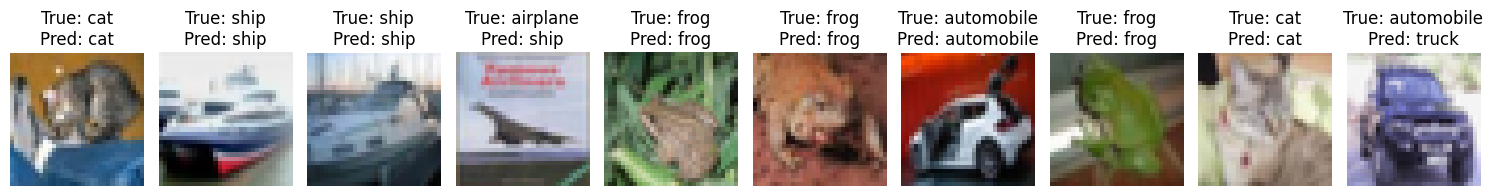

In [ ]:
# Predict the first 10 images
# We use the trained model to predict the first 10 images from the test set.
predictions = model.predict(X_test[:10])

# Convert predictions from one-hot encoding to class labels
# We convert the predictions from one-hot encoded
predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]

# Plot some sample images with true and predicted labels
plot_images(sample_images, sample_labels, predicted_labels)


1/1 [==============================] - 0s 62ms/step


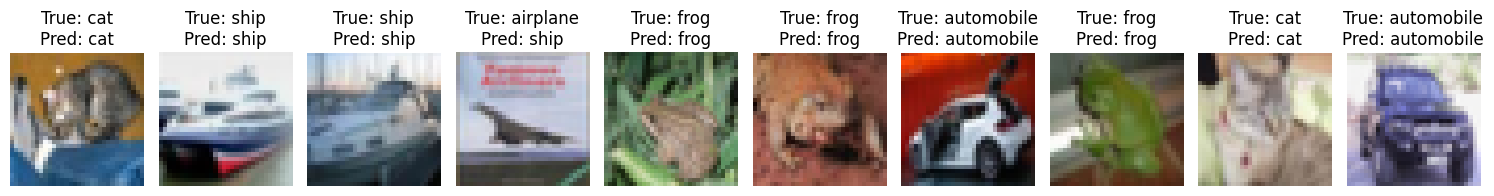

In [ ]:
# Predict the first 10 images
# We use the trained model to predict the first 10 images from the test set.
predictions = model.predict(X_test[:20])

# Convert predictions from one-hot encoding to class labels
# We convert the predictions from one-hot encoded
predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]

# Plot some sample images with true and predicted labels
plot_images(sample_images, sample_labels, predicted_labels)


## **Hyperparameter Tuning**

Hyperparameter tuning involves adjusting parameters like learning rate, batch size, and number of epochs to improve model performance. Techniques include:

* **Grid Search:** Exhaustively searching through a specified subset of hyperparameters.
* **Random Search:** Randomly sampling from a specified subset of hyperparameters.
* **Bayesian Optimization:**Using probabilistic models to find the best hyperparameters.

## **Model Evaluation and Cross-Validation**

Model evaluation assesses the model's performance on unseen data. Cross-validation splits the data into several folds, training the model on some folds and validating on others, ensuring that every data point is used for both training and validation:

In [ ]:
from keras.optimizers import Adam

In [ ]:
# def create_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', kernel_regularizer=l2(0.001)))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Flatten())
#     model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation='softmax'))

#     # Define the optimizer with a specific learning rate
#     optimizer = Adam(learning_rate=0.001)

#     # Compile the model with the optimizer
#     model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     return model


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5)
fold_no = 1

for train_index, val_index in kf.split(X_train):
    print(f"Training fold {fold_no}...")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # model = create_model()
    model.fit(X_train_fold, y_train_fold, epochs=3, batch_size=32, verbose=2)

    score = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Test loss: {score[0]} / Test accuracy: {score[1]}")

    fold_no += 1



Training fold 1...
Epoch 1/3
1250/1250 - 73s - loss: 1.8656 - accuracy: 0.3966 - 73s/epoch - 58ms/step
Epoch 2/3
1250/1250 - 74s - loss: 1.5925 - accuracy: 0.5126 - 74s/epoch - 59ms/step
Epoch 3/3
1250/1250 - 76s - loss: 1.5241 - accuracy: 0.5512 - 76s/epoch - 61ms/step
Fold 1 - Test loss: 1.3916889429092407 / Test accuracy: 0.6121000051498413
Training fold 2...
Epoch 1/3
1250/1250 - 73s - loss: 1.4816 - accuracy: 0.5753 - 73s/epoch - 58ms/step
Epoch 2/3
1250/1250 - 72s - loss: 1.4564 - accuracy: 0.5900 - 72s/epoch - 57ms/step
Epoch 3/3
1250/1250 - 72s - loss: 1.4412 - accuracy: 0.5959 - 72s/epoch - 58ms/step
Fold 2 - Test loss: 1.349668025970459 / Test accuracy: 0.6345999836921692
Training fold 3...
Epoch 1/3
1250/1250 - 74s - loss: 1.4348 - accuracy: 0.6005 - 74s/epoch - 59ms/step
Epoch 2/3
1250/1250 - 72s - loss: 1.4135 - accuracy: 0.6124 - 72s/epoch - 58ms/step
Epoch 3/3
1250/1250 - 73s - loss: 1.4032 - accuracy: 0.6203 - 73s/epoch - 59ms/step
Fold 3 - Test loss: 1.2769259214401245

In [ ]:
true_labels = np.argmax(y_test[:20], axis=1)
sample_images = X_test[:20]
true_labels_names = [class_names[label] for label in true_labels]

In [ ]:
# Define a function to plot images with Matplotlib
def plot_images(images, true_labels, predictions=None, num_images=20):
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))  # Adjust layout based on num_images
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        if i < num_images:
            ax.imshow(images[i])
            true_label = true_labels[i]
            if predictions is None:
                ax.set_title(f'True: {true_label}')
            else:
                pred_label = predictions[i]
                ax.set_title(f'True: {true_label}\nPred: {pred_label}')
            ax.axis('off')
    plt.tight_layout()
    plt.show()

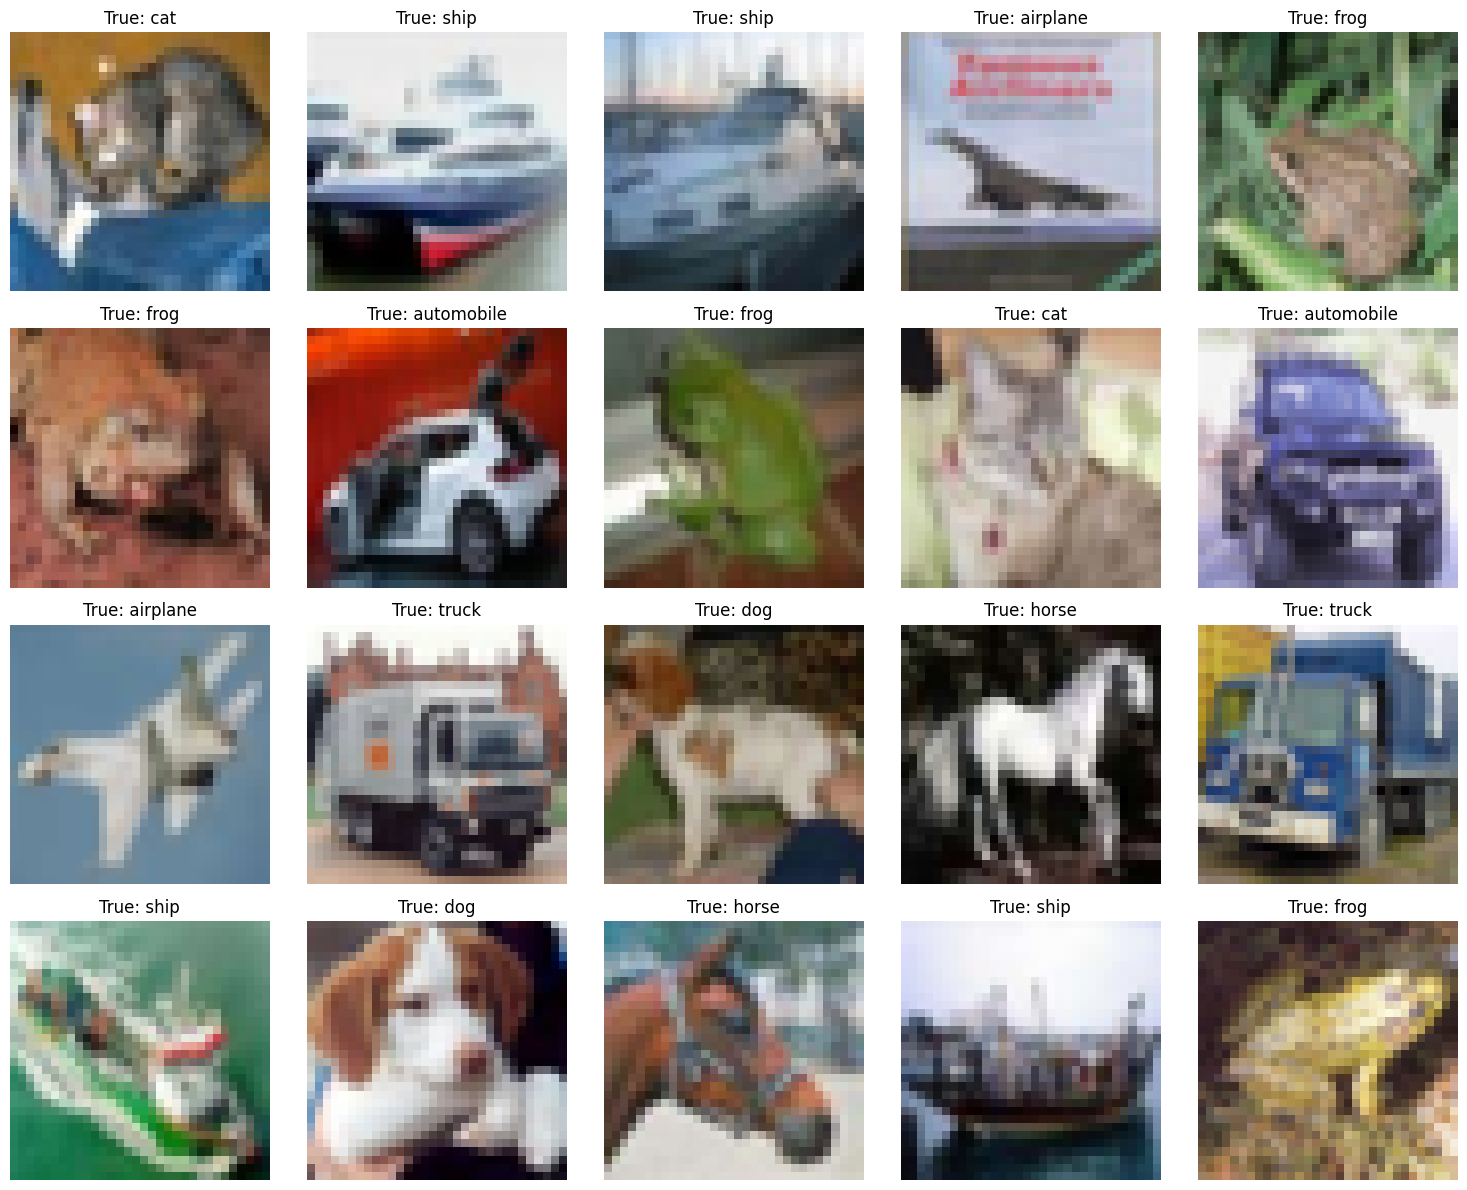

In [ ]:
# Plot some sample images with true labels
plot_images(sample_images, true_labels_names)

1/1 [==============================] - 0s 66ms/step


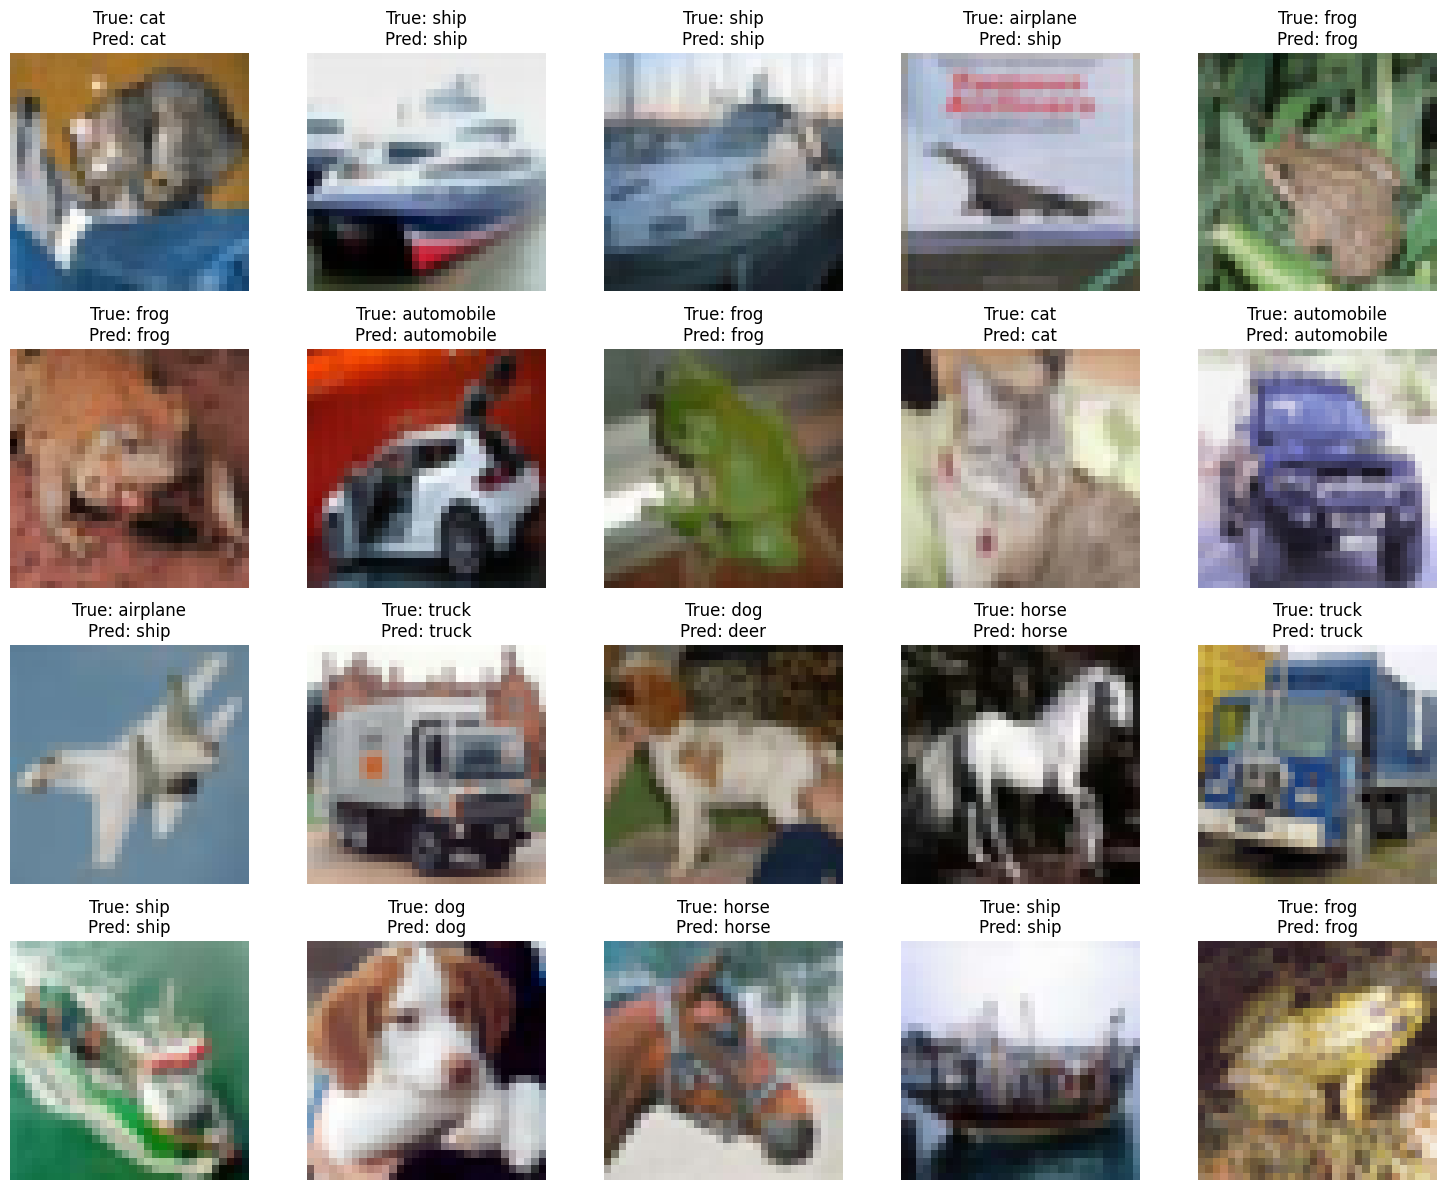

In [ ]:
# Predict and visualize the first 20 images
predictions = model.predict(X_test[:20])
predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]

# Convert true labels from one-hot encoding
true_labels = [class_names[np.argmax(label)] for label in y_test[:20]]

# Plot some sample images with true and predicted labels
plot_images(X_test[:20], true_labels, predicted_labels)
